## Lecture 2

Densities, likelihoods and MLEs

In [28]:
import numpy as np
from scipy import signal
import scipy.stats as stats
import scipy
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


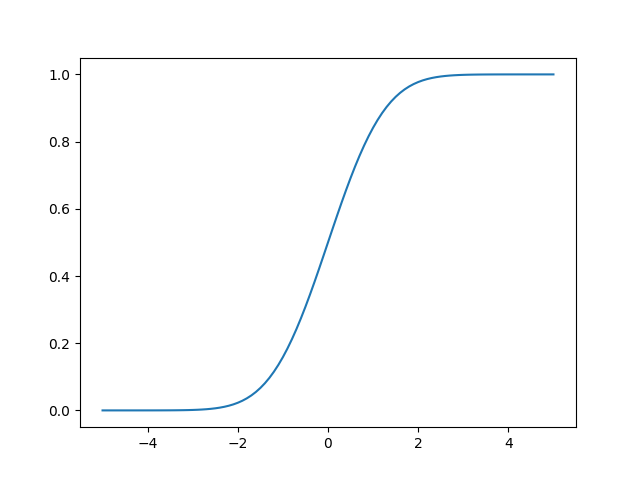

In [29]:
# normal density example
mu = 0
sd = 1

xgrid = np.linspace(-5, 5, 101)
dist = stats.norm(mu, sd)
xdensity = dist.cdf(xgrid)
plt.plot(xgrid, xdensity)
plt.show()

[-1.24344079 -1.22841811  0.00535158 -0.35823456 -0.37722391  0.36538279
 -0.1487308  -0.75625608 -0.40291061  0.03630856]


<IPython.core.display.Javascript object>


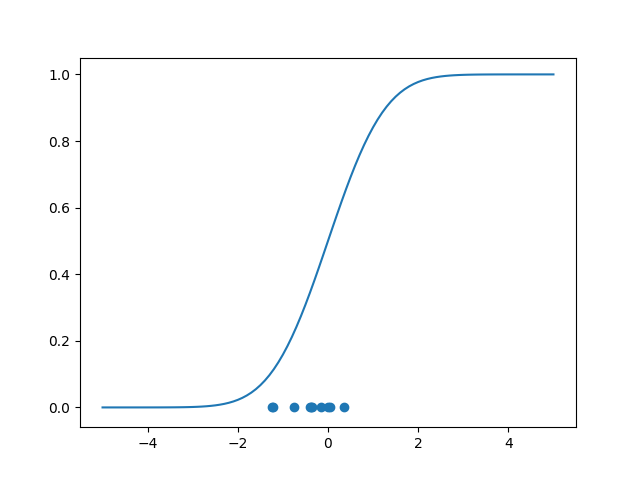

In [30]:
## random sample -- of size n from Normal
n = 10
X = dist.rvs(n)
print(X)

## add sampled points to the density plot
plt.plot(xgrid, xdensity)
plt.scatter(X, np.zeros(10))
plt.show()

In [31]:
## Likelihood of mu (addumes unknown mu, known sd)
def likeNorm(m):
    dist = stats.norm(m, sd)
    return np.exp(np.sum(dist.logcdf(X)))

def negLogLikeNorm(m):
    dist = stats.norm(m, sd)
    return -1 * np.sum(dist.logcdf(X))

<IPython.core.display.Javascript object>


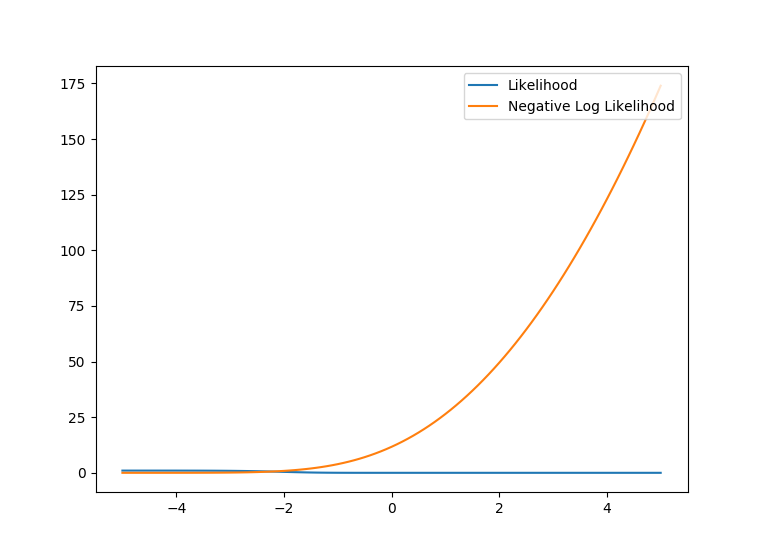

In [33]:
test_ln = list(map(likeNorm, xgrid))
test_nlln = list(map(negLogLikeNorm, xgrid))
plt.plot(xgrid, test_ln, xgrid, test_nlln)
plt.legend(('Likelihood', 'Negative Log Likelihood'),
           loc='upper right')
plt.show()

In [18]:
### Find the MLE: Optimization
nrep = 100
MLEsO = np.zeros(nrep)
MLEsN = np.zeros(nrep)
MLEvO = np.zeros(nrep)
MLEvN = np.zeros(nrep)

for i in range(nrep):
    n = 10
    dist = stats.norm(mu, sd)
    X = dist.rvs(n)
    ## tempOptim = optim(0.01,neglogLikNorm,method='L-BFGS-B',lower=-10,upper=10,hessian=TRUE)
    tempOptim = scipy.optimize.minimize(negLogLikNorm, X, method='L-BFGS-B', bounds=(-10,10))
    ## tempNLM = nlm(neglogLikNorm,0.01,hessian=TRUE)
    tempNLM = nlm()

In [20]:
list(t1)

[1, 4, 9, 16, 25]